In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. E

# Pima Indians Diabetes Database

In [2]:
# Load in the dataset
pima = pd.read_csv('/home/yungshun/workspace/py3/feature-improvement/datasets/diabetes.csv')
# If missing column names
# pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
# pima = pd.read_csv('/home/yungshun/workspace/py3/feature-improvement/datasets/diabetes.csv', names=pima_column_names)

In [3]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

In [5]:
# Another method to check for missing values
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [6]:
# Get some basic descriptive statistics
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Qualitative data

In [7]:
# Get null accuracy, 65% did not develop diabetes
pima['onset_diabetes'].value_counts(normalize=True) 

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

### Quantitative data

In [8]:
# Numerical correlation matrix
# plasma_glucose_concentration definitely seems to be an interesting feature here
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

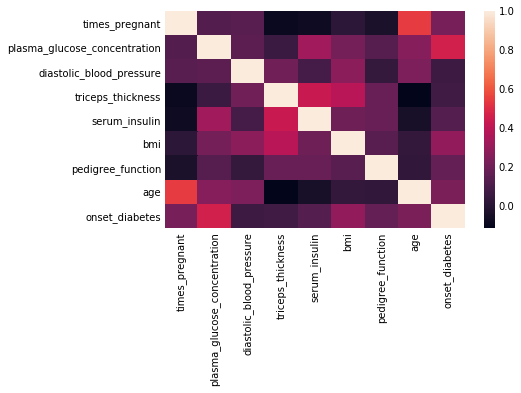

In [9]:
# Look at the heatmap of the correlation matrix of our dataset
sns.heatmap(pima.corr())

### Nominal level

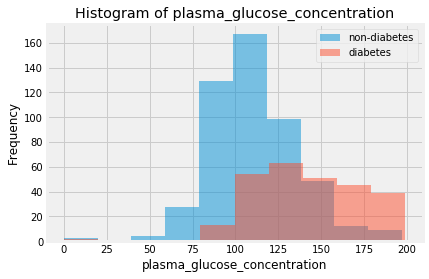

In [10]:
# Get a histogram of the plasma_glucose_concentration column for both classes
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

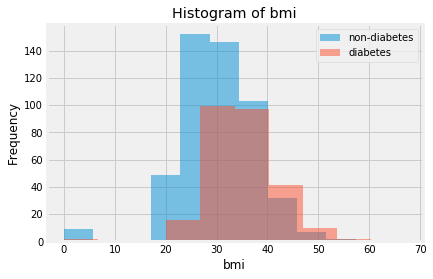

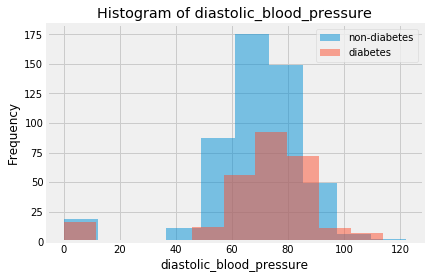

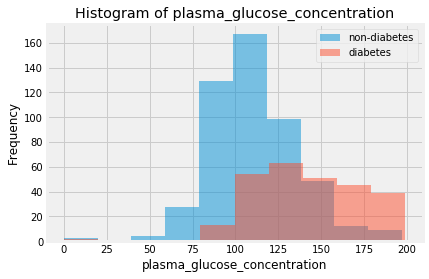

In [11]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

## Impute the missing values in data

In [12]:
# Notice that the min value of bmi is 0. That is physically impossible. 
# Perhaps 0 has been encoded as a missing value instead of None

# We see that a 0 appears as a min for 
# times_pregnant
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
# onset_diabetes

# Because 0 is a class for onset_diabetes and 0 is a viable number for times_pregnant, we may conclude that 0 is encoding missing values for 
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi

In [13]:
# Replace the 0's in these columns with None so our fillna, and dropna functions may work properly
pima['serum_insulin'].isnull().sum()

0

In [14]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)

In [15]:
pima['serum_insulin'].isnull().sum()

374

In [16]:
# For all columns
for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)

In [17]:
# This makes more sense now
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [18]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [19]:
# Doesn't include columns with missing values
pima.describe()

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


### fillna()

In [21]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

In [22]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [23]:
# Fill the column's missing values with the mean of the rest of the column
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)

In [24]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [25]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

### Imputer()

In [27]:
imputer = Imputer(strategy='mean')

In [28]:
pima_imputed = imputer.fit_transform(pima)

In [29]:
# Comes out as an array
type(pima_imputed)

numpy.ndarray

In [30]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima.columns)

In [31]:
# Notice for example the triceps_thickness missing values were replaced with 29.15342
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [32]:
# Same values as we obtained with fillna
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [33]:
# No missing values
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

## Remove harmful rows of data

### dropna()

In [34]:
# Drop the rows with missing values
pima_dropped = pima.dropna()

In [35]:
# Lost over half of the rows
print("retained {}% of rows".format(round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))))

retained 49% of rows


In [36]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [ ]:
# The split of trues and falses stay relatively the same
pima_dropped['onset_diabetes'].value_counts(normalize=True)

In [ ]:
# The mean values of each column (with missing values rows dropped)
pima_dropped.mean()

In [37]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.143012
plasma_glucose_concentration    0.007712
diastolic_blood_pressure       -0.023941
triceps_thickness              -0.001073
serum_insulin                   0.001089
bmi                             0.018950
pedigree_function               0.107230
age                            -0.072236
onset_diabetes                 -0.052068
dtype: float64

Text(0,0.5,'% change')

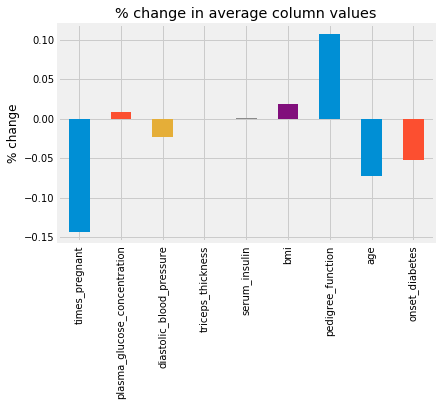

In [38]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')
# The pedigree_fucntion average rose 11% after dropping missing values, which is a big increase,
# while the number of times pregnant dropped 14%.
# We can see how dropping values severely affects the shape of the data and we should try to retain as much as possible.

## Pipelines in machine learning

The goal of the learning algorithm is to generalize the patterns in the training set in order to apply those patterns to the testing set. If we impute values for the entire dataset before splitting the set and applying learning algorithms, then we are cheating and our models are not actually learning any patterns.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
# Impute values and see its effect on the KNN model for classification.

In [41]:
# Note we are using the dataset with the dropped rows
X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# Create our feature matrix by removing the response variable
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

# Our grid search variables and instances
# KNN parameters to try
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)
# But we are learning from way fewer rows.

learning from 393 rows
0.7455470737913485 {'n_neighbors': 7}


In [43]:
# impute values with 0
pima_zero = pima.fillna(0)

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print(grid.best_score_, grid.best_params_)  
# If the values stayed at 0, our accuracy goes down.

learning from 768 rows
0.7330729166666666 {'n_neighbors': 6}


In [44]:
from sklearn.model_selection import train_test_split

In [ ]:
# The improper way. Imputing values BEFORE splitting.

In [45]:
X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insulin    374
dtype: int64

In [46]:
entire_data_set_mean = X.mean()
X = X.fillna(entire_data_set_mean)
print(entire_data_set_mean)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

serum_insulin    155.548223
dtype: float64


In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.65625

In [ ]:
# The proper way. Imputing values AFTER splitting.

In [48]:
X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X.isnull().sum()

serum_insulin    374
dtype: int64

In [49]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

print(training_mean)  
# Not the entire dataset's mean, it's much higher.

serum_insulin    158.546053
dtype: float64


In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
# Lower accuracy, but much more honest in the mode's ability to generalize a pattern to outside data.

0.4895833333333333

### Pipeline()

In [51]:
from sklearn.pipeline import Pipeline

In [ ]:
# strategy = 'mean'

In [52]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
# Must redefine params to fit the pipeline

mean_impute = Pipeline([('imputer', Imputer(strategy='mean')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7317708333333334 {'classify__n_neighbors': 6}


In [ ]:
# strategy = 'median'

In [53]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

median_impute = Pipeline([('imputer', Imputer(strategy='median')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7369791666666666 {'classify__n_neighbors': 6}


In [ ]:
# Our accuracies may be lower, but they were made on more than twice the size of the dataset with missing values!
# they were still better than leaving them all at 0

## Standardization & Normalization

1. <b>Z-score standardization</b> 
2. <b>Min-max scaling</b>
3. <b>Row normalization</b>

From the <b>Normalizer</b> docs:<br/>
Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.<br/>

And <b>StandardScaler</b>:<br/>
Standardize features by removing the mean and scaling to unit variance

In other words Normalizer acts <b>row-wise</b> and StandardScaler <b>column-wise</b>. Normalizer does not remove the mean and scale by deviation but scales the whole row to unit norm.

In [55]:
impute = Imputer(strategy='mean')
# we will want to fill in missing values to see all 9 columns

pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fd23efd0>,
      dtype=object)

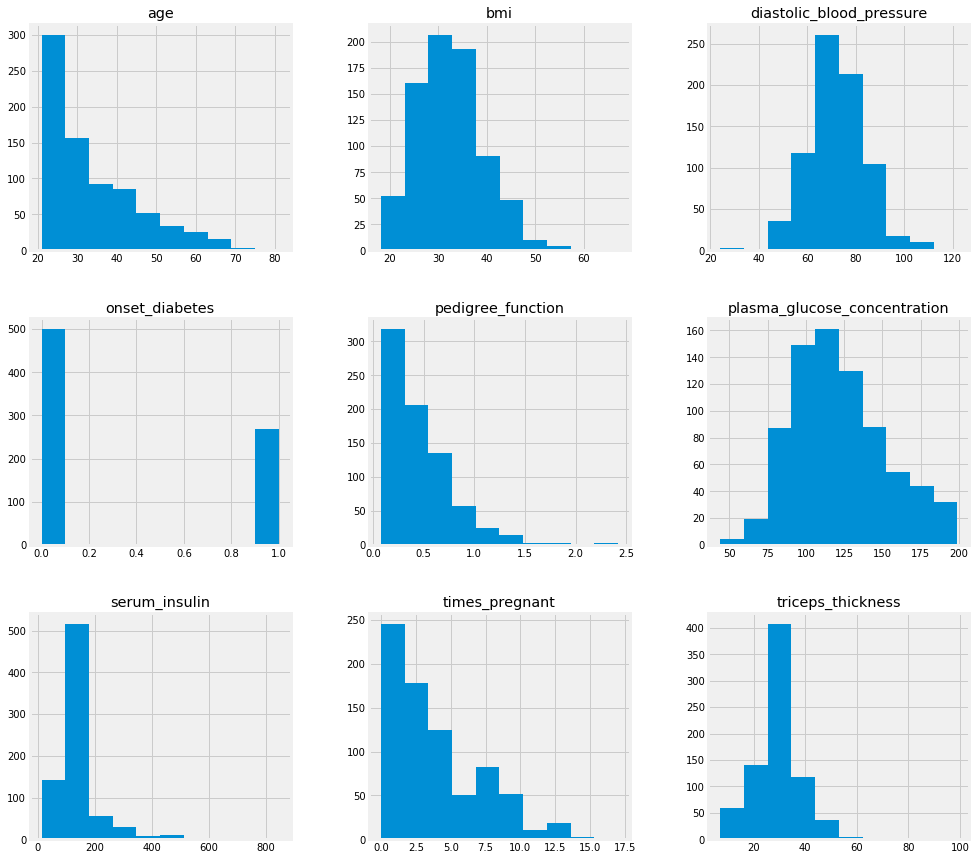

In [56]:
pima_imputed_mean.hist(figsize=(15, 15))

In [57]:
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fcae16a0>,
      dtype=object)

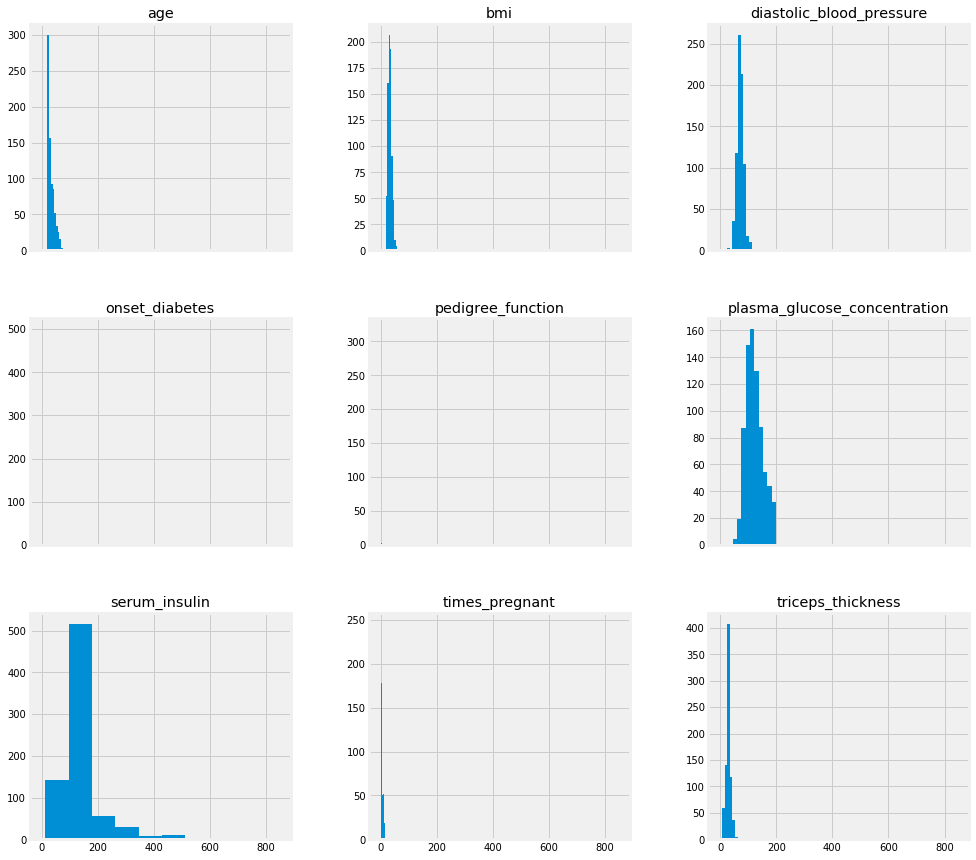

In [58]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)
# With the same x axis (the y axis is not as important here)

### Z-score standardization

In [ ]:
# Manually compute

In [59]:
print(pima['plasma_glucose_concentration'].head())

# Get the mean of the column
mu = pima['plasma_glucose_concentration'].mean()

# Get the standard deviation of the column
sigma = pima['plasma_glucose_concentration'].std()

# Calculate z scores for every value in the column.
print(((pima['plasma_glucose_concentration'] - mu) / sigma).head())

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, dtype: float64
0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, dtype: float64


In [ ]:
# scikit-learn

In [60]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# mean and std before z score standardizing
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

Text(0.5,1,'Distribution of plasma_glucose_concentration')

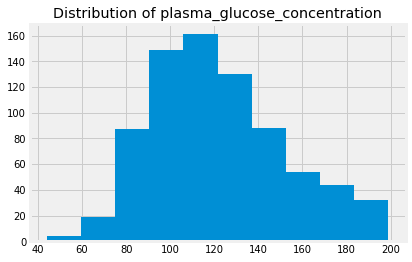

In [61]:
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

In [64]:
# StandardScaler() from scikit-learn

In [62]:
glucose_z_score_standardized = StandardScaler().fit_transform(pima[['plasma_glucose_concentration']])
# Note we use the double bracket notation [[ ]] because the transformer requires a dataframe

# mean of 0 (floating point error) and standard deviation of 1
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5,1,'Distribution of plasma_glucose_concentration after Z Score Scaling')

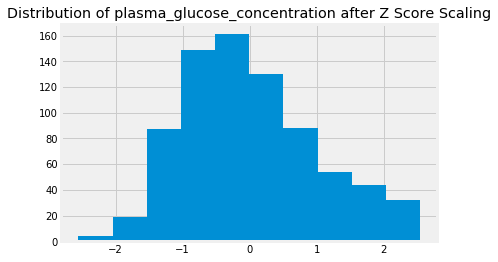

In [63]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

In [ ]:
# Pipeline() including StandardScaler()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fcf07898>,
      dtype=object)

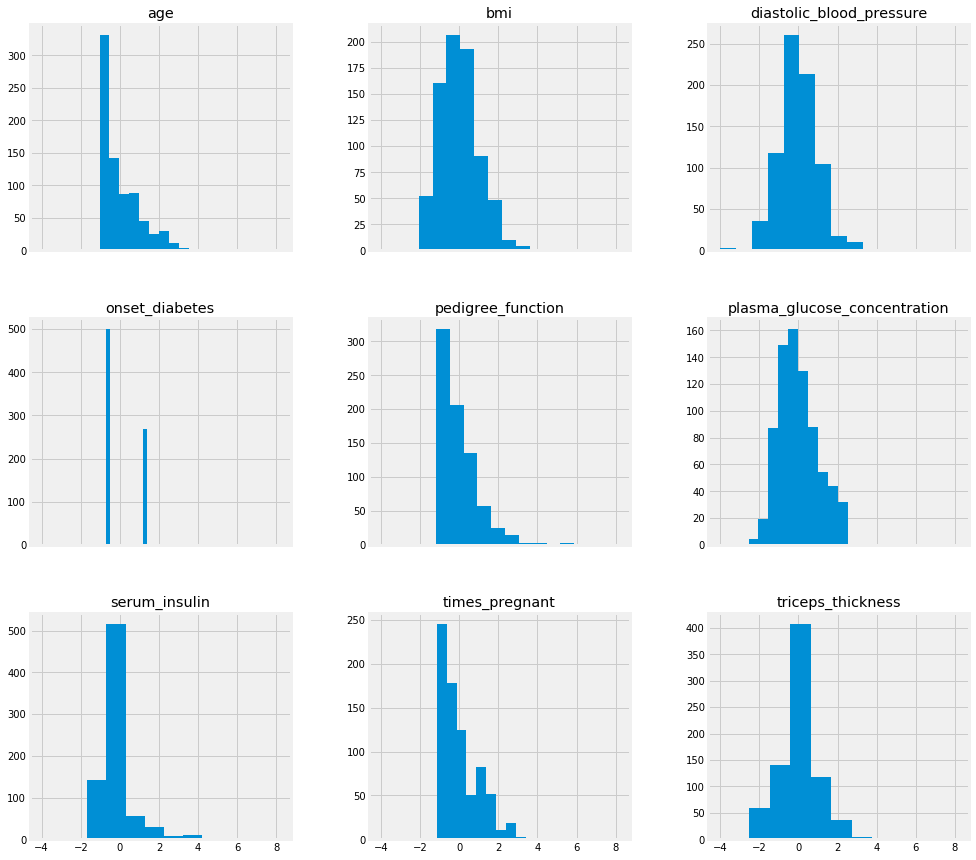

In [68]:
# Instantiate a z-scaler object
scale = StandardScaler()

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima.columns)

pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)
# Now all share the same "space"

In [69]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7421875 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


### Min-max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# MinMaxScaler() from scikit-learn

In [65]:
glucose_min_max_standardized = MinMaxScaler().fit_transform(pima[['plasma_glucose_concentration']])

# Doesn't guarantee a mean or standard deviation
glucose_min_max_standardized.mean(), glucose_min_max_standardized.std()

(0.5012049211516509, 0.19623307962522193)

Text(0.5,1,'Distribution of plasma_glucose_concentration after Min Max Scaling')

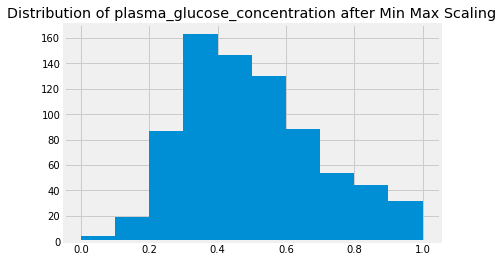

In [66]:
ax = pd.Series(glucose_min_max_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Min Max Scaling')
# Notice the shape never changes, but the values do

In [ ]:
# Pipeline() including MinMaxScaler()

In [71]:
min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima.columns)

In [72]:
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)
# This is the best accuracy we've gotten so far working with missing data

0.74609375 {'classify__n_neighbors': 4, 'imputer__strategy': 'mean'}
